### 10 Academy: Artificial Intelligence Mastery
#### Week 3 Challenge
##### Statistical Modeling  
Ethel Cherotaw

In [2]:
import sys
import numpy as np
import os
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

data_dir=data_dir = r'E:\2017.Study\Tenx\Week-3\Data\data'
src_dir = r'E:\2017.Study\Tenx\Week-3\Insurance\W3.Insurance-Planning.AIM2\src'


sys.path.append(src_dir)
sys.path.append(data_dir)
from Modeling_utils import InsuranceModeling 
from Feuture_utils  import InsuranceDataUtils

In [3]:
csv_file_path = r'E:\2017.Study\Tenx\Week-3\Data\data\cleaned_data.csv'
df = pd.read_csv(csv_file_path, low_memory=False)
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


##### Data Processing 
Even though the data is already cleaned, let's double-check for any remaining missing values.

In [4]:
missing_values = df.isnull().sum()
# Display columns with missing values and the count
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


Series([ ], dtype: int64): indicates that there are no missing values in our dataset. The data is already cleaned on task-1 and there are no missing values to handle.

#### Feature Engineering

Feature engineering: is the process of transforming raw data into relevant information for use by machine learning models. In other words, feature engineering is the process of creating predictive model features. A feature—also called a dimension—is an input variable used to generate model predictions. Because model performance largely rests on the quality of data used during training, feature engineering is a crucial preprocessing technique that requires selecting the most relevant aspects of raw training data for both the predictive task and model type under consideration.[1]

New feature 

1. Extracting information from dates, such as the age of the vehicle from RegistrationYear.
2. Binning SumInsured and cubiccapacity

Converting continuous variables into categorical bins (e.g., "Low," "Medium," "High"). This can help models to understand different risk categories more easily.

3. Extracting Information from TransactionMonth:

features such as:

Month: Helps identify seasonality.

Quarter: Groups months into quarters.

Year: Can be useful if the data spans multiple years.

4.  Log-Transforming Skewed Features:

Features like SumInsured and CalculatedPremiumPerTerm can be highly skewed. Applying a log transformation can normalize these distributions.

In [5]:
# Initialize and preprocess
utils = InsuranceDataUtils(df, target_column='TotalPremium')
utils.add_date_features()
utils.add_vehicle_age()
utils.combine_province_zone()
utils.apply_log_transformation()

# Get the new dataset with only selected features
selected_features_df = utils.get_selected_features_df()

# Get the new dataset with only selected features
selected_features_df = utils.get_selected_features_df()
# List unique values in the 'Province' column
selected_features_df.head()


       LogSumInsured  LogCapitalOutstanding
count   1.000098e+06           1.000098e+06
mean    9.412743e+00           2.550096e+00
std     4.009265e+00           5.008409e+00
min     9.950331e-03           9.999950e-06
25%     8.517393e+00           9.999950e-06
50%     8.922792e+00           9.999950e-06
75%     1.242922e+01           9.999950e-06
max     1.635208e+01           1.345884e+01


,TransactionYear,TransactionMonthOnly,VehicleAge,ProvinceZone,LogSumInsured,LogCapitalOutstanding,TotalPremium,TotalClaims
0,2015,3,20,Gauteng_Rand East,0.009950,11.689405,21.929825,0.0
1,2015,5,20,Gauteng_Rand East,0.009950,11.689405,21.929825,0.0
2,2015,7,20,Gauteng_Rand East,0.009950,11.689405,0.000000,0.0
3,2015,5,20,Gauteng_Rand East,11.689405,11.689405,512.848070,0.0
4,2015,7,20,Gauteng_Rand East,11.689405,11.689405,0.000000,0.0


#### Preprocessing(encoding):

Selected relevant features and preprocessed the data:
1. Categorical Features: One-hot encoded.

2. Numerical Features: Standard scaled.

Created preprocessed DataFrames for analysis.

#### Data Split 
The data was split for both the TotalClaims and TotalPremium variables. First, the process began by initializing the InsuranceDataUtils class with TotalClaims as the target variable, followed by feature preprocessing. The data was then divided into training and testing sets, and the shapes of these datasets were verified. Similarly, for TotalPremium, InsuranceDataUtils was initialized with TotalPremium as the target variable. The features were preprocessed, and the data was split into training and testing sets, with the shapes of the resulting datasets also confirmed.

##### TotalPremium

In [6]:
# Initialize with target column for TotalPremium
encode_premium = InsuranceDataUtils(selected_features_df, target_column='TotalPremium')
encode_premium.preprocess_features()
encode_premium.split_data()
preprocessed_df = encode_premium.get_preprocessed_df()

preprocessed_df.head()
# Initialize with target column for TotalClaims
X_train_premium, X_test_premium, y_train_premium, y_test_premium = encode_premium.get_train_test_data()

Starting feature preprocessing...
Preprocessing successful.
DataFrame created successfully with shape: (1000098, 27)
Training data shape for TotalPremium: (800078, 26)
Testing data shape for TotalPremium: (200020, 26)


##### TotalClaims

In [7]:
encode_claims = InsuranceDataUtils(selected_features_df, target_column='TotalClaims')
encode_claims.preprocess_features()
encode_claims.split_data()
preprocessed_df = encode_claims.get_preprocessed_df()

preprocessed_df.head()
# Print the shapes to verify
X_train_claims, X_test_claims, y_train_claims, y_test_claims = encode_claims.get_train_test_data()

Starting feature preprocessing...
Preprocessing successful.
DataFrame created successfully with shape: (1000098, 27)
Training data shape for TotalClaims: (800078, 26)
Testing data shape for TotalClaims: (200020, 26)


In [8]:
print("Data split for TotalPremium:")
print("Training set shape:", encode_premium.X_train.shape)
print("Testing set shape:", encode_premium.X_test.shape)

print("Data split for TotalClaims:")
print("Training set shape:", encode_claims.X_train.shape)
print("Testing set shape:", encode_claims.X_test.shape)


Data split for TotalPremium:
Training set shape: (800078, 26)
Testing set shape: (200020, 26)
Data split for TotalClaims:
Training set shape: (800078, 26)
Testing set shape: (200020, 26)


#### Modeling (Planned)

Modeling Setup:
    
Planned to use,linear regression, DecisionTreeRegressor, RandomForestRegressor, and GradientBoostingRegressor to model the data for both TotalClaims and TotalPremium.

Metrics:
    
Will evaluate models using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [9]:
modeling = InsuranceModeling(
    X_train_premium, X_test_premium, y_train_premium, y_test_premium,
    X_train_claims, X_test_claims, y_train_claims, y_test_claims
)


In [10]:
modeling.train_models()
modeling.evaluate_models()



Training Linear Regression for TotalPremium...
Training Linear Regression for TotalClaims...
Training Random Forest for TotalPremium...
Training Random Forest for TotalClaims...
Training XGBoost for TotalPremium...
Training XGBoost for TotalClaims...
Training Decision Tree for TotalPremium...
Training Decision Tree for TotalClaims...

Evaluation for TotalPremium:
Linear Regression: RMSE = 0.70, MAE = 0.40
Random Forest: RMSE = 0.41, MAE = 0.17
XGBoost: RMSE = 0.47, MAE = 0.22
Decision Tree: RMSE = 0.41, MAE = 0.17

Evaluation for TotalClaims:
Linear Regression: RMSE = 0.92, MAE = 0.06
Random Forest: RMSE = 1.02, MAE = 0.06
XGBoost: RMSE = 0.97, MAE = 0.06
Decision Tree: RMSE = 1.06, MAE = 0.06


#### Model Training and Evaluation:

Train and evaluate the models using the prepared training and testing datasets.

Fine-tuning and Validation:

Perform hyperparameter tuning and cross-validation to improve model performance.

Results Analysis:

Analyze and interpret model results to make data-driven decisions.


Feature Importance for Linear Regression (TotalPremium):
Feature importance not available for this model.

Feature Importance for Linear Regression (TotalClaims):
Feature importance not available for this model.

Feature Importance for Random Forest (TotalPremium):
Feature 0: 0.0697
Feature 1: 0.2638
Feature 2: 0.0757
Feature 3: 0.5088
Feature 4: 0.0000
Feature 5: 0.0000
Feature 6: 0.0008
Feature 7: 0.0000
Feature 8: 0.0004
Feature 9: 0.0043
Feature 10: 0.0010
Feature 11: 0.0076
Feature 12: 0.0047
Feature 13: 0.0095
Feature 14: 0.0059
Feature 15: 0.0094
Feature 16: 0.0086
Feature 17: 0.0011
Feature 18: 0.0038
Feature 19: 0.0065
Feature 20: 0.0001
Feature 21: 0.0000
Feature 22: 0.0138
Feature 23: 0.0014
Feature 24: 0.0031
Feature 25: 0.0000

Feature Importance for Random Forest (TotalClaims):
Feature 0: 0.0697
Feature 1: 0.2638
Feature 2: 0.0757
Feature 3: 0.5088
Feature 4: 0.0000
Feature 5: 0.0000
Feature 6: 0.0008
Feature 7: 0.0000
Feature 8: 0.0004
Feature 9: 0.0043
Feature 10: 0.00

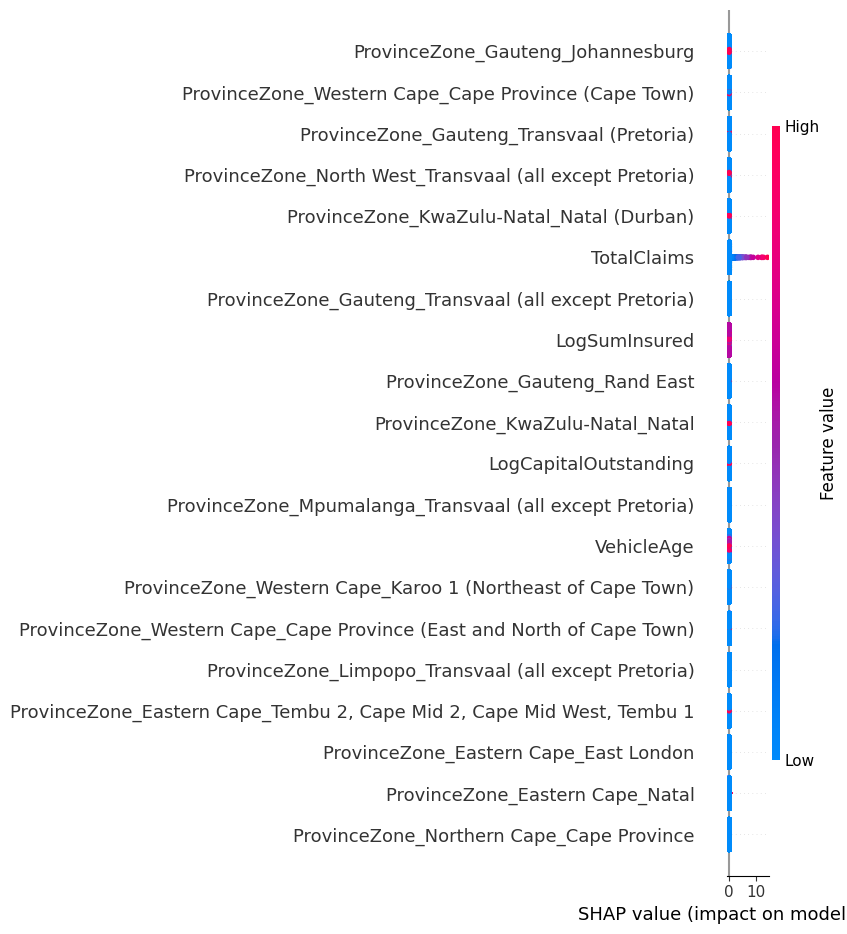

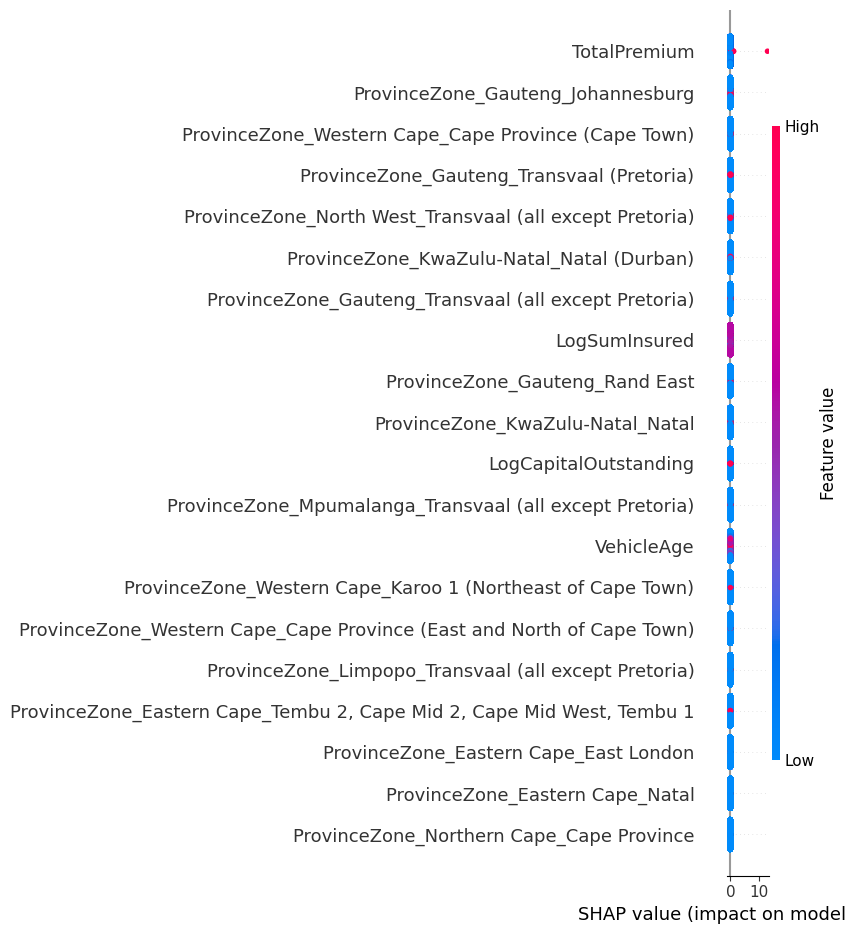

100%|===================| 199974/200020 [07:55<00:00]        

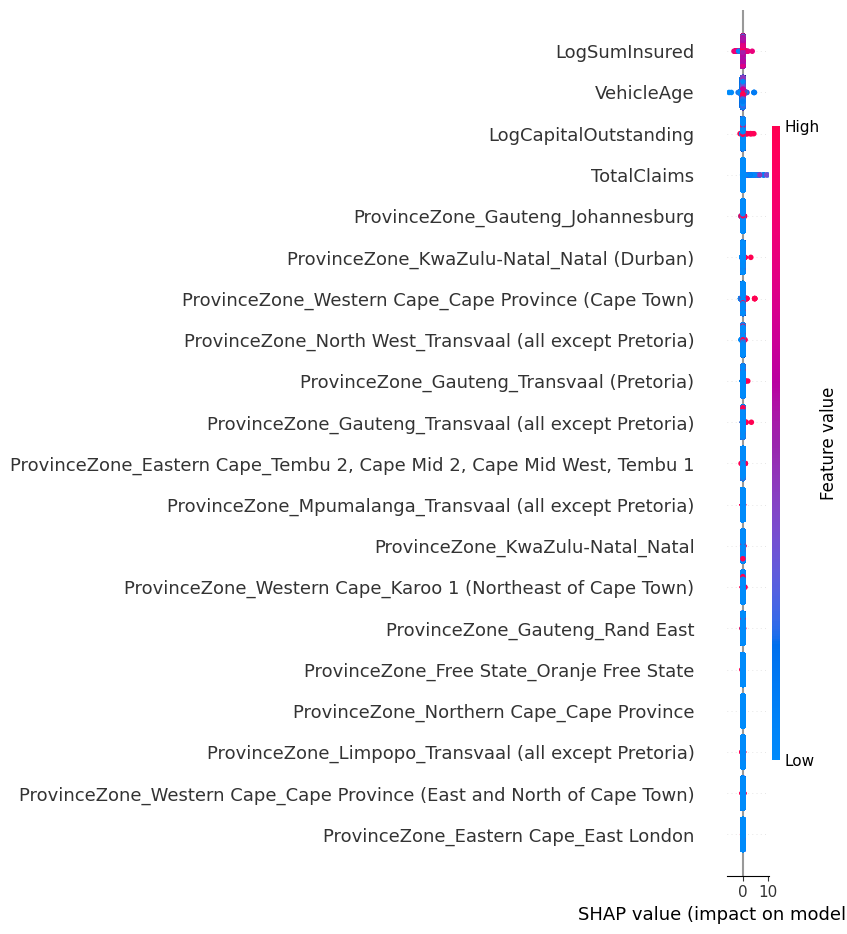

100%|===================| 199723/200020 [08:49<00:00]        

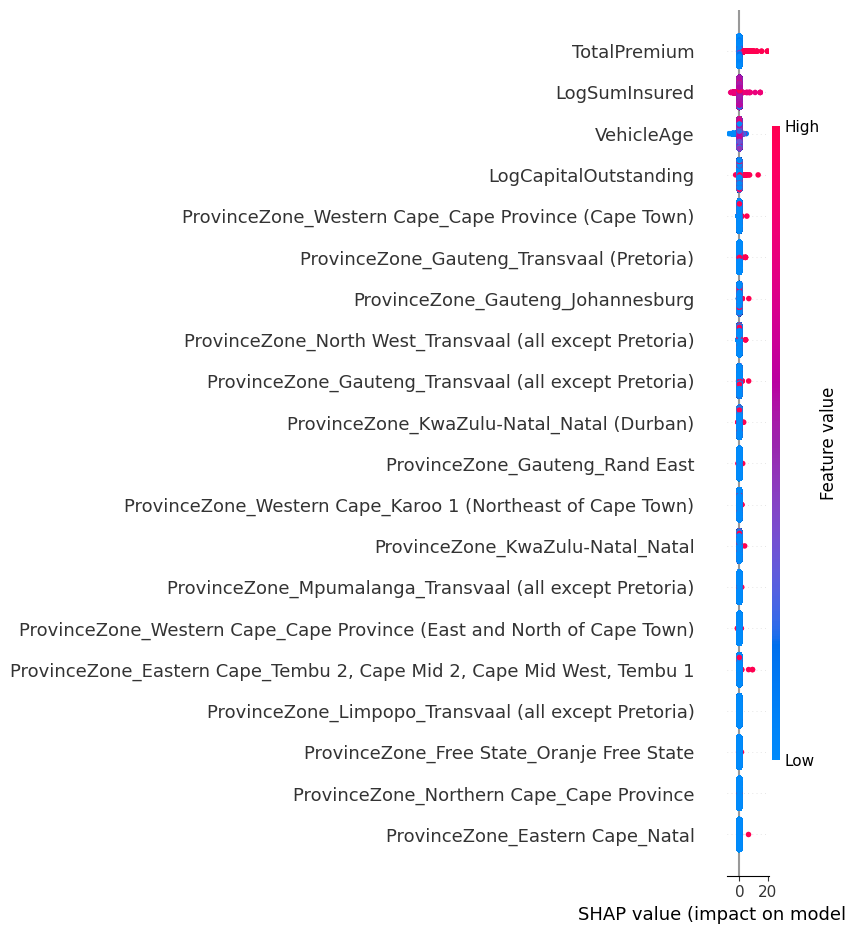

In [11]:
modeling.feature_importance_analysis()
modeling.shap_analysis('Linear Regression')
modeling.shap_analysis('XGBoost')  # Replace with the desired model name
#modeling.lime_analysis('Decision Tree')
#modeling.shap_analysis('Random Forest')


#### Reference  
1. https://www.ibm.com/topics/feature-engineering
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
3. https://plotly.com/~akc465911567/28.embed
4. https://www.kaggle.com/code/swatisinghalmav/best-of-8-regression-models-to-predict-strength
